# Prediction of sales

### Problem Statement
[The dataset](https://drive.google.com/file/d/1B07fvYosBNdIwlZxSmxDfeAf9KaygX89/view?usp=sharing) represents sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store are available. The aim is to build a predictive model and find out the sales of each product at a particular store.

|Variable|Description|
|: ------------- |:-------------|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particulat store. This is the outcome variable to be predicted.|

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read files:
data = pd.read_csv("regression_exercise.csv", delimiter=',')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Outlet_Sales,0,0.000000
Outlet_Type,0,0.000000
Outlet_Location_Type,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Identifier,0,0.000000
Item_MRP,0,0.000000
Item_Type,0,0.000000
Item_Visibility,0,0.000000


In [4]:
# extract the names of columns with missing values
col_with_missing = missing_data[missing_data.Percent > 0].index.tolist()

# remove column names that are alteady removed from dataset
missing_cols = list(set(col_with_missing))

# check the datatype
data.dtypes[missing_cols]

Outlet_Size     object
Item_Weight    float64
dtype: object

In [5]:
# create a separate column to keep the information whether the value was missing
num_cols_with_missing = data.dtypes[missing_cols][data.dtypes[missing_cols] == 'float']\
                        .index.tolist()

# create new varible with the information that it was missing
for cl in num_cols_with_missing:
    data[cl + '_missing_ind']=0
    data.loc[data[cl].isnull(), cl + "_missing_ind"]=1

In [6]:
data['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [7]:
mean_per_item_type = data.groupby('Item_Type').mean()['Item_Weight']
mean_per_item_type

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [8]:
# Replace value withe the mean item type = Checked the results
data['Item_Weight']=data["Item_Weight"].fillna(data.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [9]:
# Replace categorical valeu with = Checked the results
data["Outlet_Size"] = data["Outlet_Size"].fillna("Empty")

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
Item_Weight_missing_ind,0,0.0
Item_Outlet_Sales,0,0.0
Outlet_Type,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Size,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
Item_MRP,0,0.0
Item_Type,0,0.0
Item_Visibility,0,0.0


## 4. Feature Engineering

1. Resolving the issues in the data to make it ready for the analysis.
2. Create some new variables using the existing ones.





### Create a broad category of Type of Item

Item_Type variable has many categories which might prove to be very useful in analysis. Look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. Use the Item_Identifier variable to create a new column

In [11]:
data['Item_Identifier_categ'] = data['Item_Identifier'].str[:2]

(-0.5, 2.5, 0.0, 15000.0)

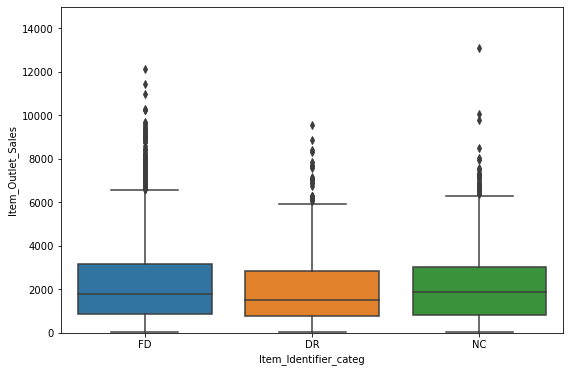

In [12]:
var = 'Item_Identifier_categ'
f, ax = plt.subplots(figsize=(9,6))
data2 = data[['Item_Outlet_Sales', var]]
fig = sns.boxplot(x=var, y='Item_Outlet_Sales', data=data2)
fig.axis(ymin=0, ymax=15000)

In [13]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Item_Identifier_categ
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,FD
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Empty,Tier 3,Grocery Store,732.3800,0,FD
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,FD
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Empty,Tier 2,Supermarket Type1,549.2850,0,FD
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,NC
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,FD


### Determine the years of operation of a store

Make a new column depicting the years of operation of a store (i.e. how long the store exists). 

In [14]:
data2=data.copy()

In [15]:
data2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Item_Identifier_categ
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,FD
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Empty,Tier 3,Grocery Store,732.3800,0,FD
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,FD
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Empty,Tier 2,Supermarket Type1,549.2850,0,FD
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,NC
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,FD


In [16]:
data['Years_Of_Operations'] = (2020 - data2['Outlet_Establishment_Year'])
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Item_Identifier_categ,Years_Of_Operations
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,FD,21
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,DR,11
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,FD,21
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Empty,Tier 3,Grocery Store,732.3800,0,FD,22
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,NC,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,FD,33
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Empty,Tier 2,Supermarket Type1,549.2850,0,FD,18
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,NC,16
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,FD,11


### Modify categories of Item_Fat_Content

There are difference in representation in categories of Item_Fat_Content variable. This should be corrected.

In [17]:
data['Item_Fat_Content_catego'] = data.Item_Fat_Content.replace({'Low Fat' : 1,
                                                                  'Regular' : 2,
                                                                  'low fat':1,
                                                                  'LF':1,
                                                                  'reg':2
                                                                 })

In [18]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Item_Identifier_categ,Years_Of_Operations,Item_Fat_Content_catego
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,FD,21,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,DR,11,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,FD,21,1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Empty,Tier 3,Grocery Store,732.3800,0,FD,22,2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0,NC,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,0,FD,33,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Empty,Tier 2,Supermarket Type1,549.2850,0,FD,18,2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0,NC,16,1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,0,FD,11,2


There are some non-consumables as well and a fat-content should not be specified for them. Create a separate category for such kind of observations.

In [19]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
data.loc[data['Item_Type'] =='Household','Item_Fat_Content_catego'] = 0
data.loc[data['Item_Type'] =='Health and Hygiene','Item_Fat_Content_catego'] = 0
data.loc[data['Item_Type'] =='Others','Item_Fat_Content_catego'] = 0

In [21]:
data['Item_Fat_Content_catego'].unique()

array([1, 2, 0])

### Numerical and One-Hot Encoding of Categorical variables

Since scikit-learn algorithms accept only numerical variables, we need to convert all categorical variables into numeric types. 

- if the variable is Ordinal we can simply map its values into numbers
- if the variable is Nominal (we cannot sort the values) we need to One-Hot Encode them --> create dummy variables

In [22]:
data = data.replace({"Item_Fat_Content" : {"N/A":0, "Regular" : 1,"reg":1, "Low Fat" : 2,'low fat':2, 'LF':2},
                     "Outlet_Size" : {"Empty" : 0, "Small" : 1, "Medium" : 2, "High" : 3},
                     "Outlet_Location_Type" : {"Tier 3" : 1, "Tier 2" : 2, "Tier 1" : 3}}
                   )

In [23]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_missing_ind,Item_Identifier_categ,Years_Of_Operations,Item_Fat_Content_catego
0,FDA15,9.300,2,0.016047,Dairy,249.8092,OUT049,1999,2,3,Supermarket Type1,3735.1380,0,FD,21,1
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,2,1,Supermarket Type2,443.4228,0,DR,11,2
2,FDN15,17.500,2,0.016760,Meat,141.6180,OUT049,1999,2,3,Supermarket Type1,2097.2700,0,FD,21,1
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,0,1,Grocery Store,732.3800,0,FD,22,2
4,NCD19,8.930,2,0.000000,Household,53.8614,OUT013,1987,3,1,Supermarket Type1,994.7052,0,NC,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,2,0.056783,Snack Foods,214.5218,OUT013,1987,3,1,Supermarket Type1,2778.3834,0,FD,33,1
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,0,2,Supermarket Type1,549.2850,0,FD,18,2
8520,NCJ29,10.600,2,0.035186,Health and Hygiene,85.1224,OUT035,2004,1,2,Supermarket Type1,1193.1136,0,NC,16,0
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,2,1,Supermarket Type2,1845.5976,0,FD,11,2


All variables should be by now numeric

### Exporting Data
you can save the processed data to disk

In [24]:
data.to_csv('data_preparated_csv')

In [25]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1, keys=['Total','Percent'])
missing_data.head(15)

,Total,Percent
Item_Fat_Content_catego,0,0.0
Years_Of_Operations,0,0.0
Item_Identifier_categ,0,0.0
Item_Weight_missing_ind,0,0.0
Item_Outlet_Sales,0,0.0
Outlet_Type,0,0.0
Outlet_Location_Type,0,0.0
Outlet_Size,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Identifier,0,0.0
